In [430]:
#Model Evaluation and Tuning

In [434]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [474]:
# Libraries we will be using today
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve,auc
from skopt import BayesSearchCV


In [438]:
# Load dataset
url = 'datasets/master/titanic.csv'
titanic = pd.read_csv(url)
# Display the first few rows of the dataset
print("Titanic Dataset:")
print(titanic.head())


Titanic Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [440]:
#Steps for Data Preparation: 1. Handle missing values. 2. Encode categorical variables. 3. Split the dataset into features and target

In [442]:
# Handle missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)


C:\Users\ashis\AppData\Local\Temp\ipykernel_16884\1947353562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\ashis\AppData\Local\Temp\ipykernel_16884\1947353562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [444]:
# Encode categorical variables
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

In [446]:
# Drop columns that won't be used
titanic = titanic.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

In [448]:
# Split the dataset into features and target
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

In [450]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [452]:
# Display the shapes of the datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (712, 7), (712,)
Testing set shape: (179, 7), (179,)


In [454]:
#Steps for Cross-Validation: 1. Choose the number of folds.2. Train and evaluate the model on each fold.3. Calculate the average performance.


In [456]:
#Perform cross-validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Average Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores:
[0.82517483 0.75524476 0.81690141 0.78169014 0.83802817]
Average Cross-Validation Score: 0.803407859745888


In [458]:
#Steps for Grid Search: 1. Define the hyperparameter grid. 2. Train and evaluate the model on each combination.3. Choose the best combination based 
#on performance.

In [460]:
# Define the hyperparameter grid
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10]
}
# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_}")
# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("Test Set Accuracy:")
print(accuracy_score(y_test, y_pred_rf))


Best Hyperparameters:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.8229882793263077
Test Set Accuracy:
0.8491620111731844


In [462]:
#Steps for Bayesian Optimization: 1. Define the hyperparameter space.2. Train and evaluate the model on sampled points.
#3. Choose the best hyperparameters based on performance.

In [464]:
# Define the hyperparameter space
param_space = {
 'n_estimators': (50, 200),
 'max_depth': (1, 20),
 'min_samples_split': (2, 10)
}
# Perform Bayesian optimization
bayes_search = BayesSearchCV(rf_model, param_space, n_iter=32, cv=5, scoring='accuracy', random_state=4)
bayes_search.fit(X_train, y_train)
print("Best Hyperparameters:")
print(bayes_search.best_params_)
print(f"Best Cross-Validation Score: {bayes_search.best_score_}")
# Evaluate the best model on the test set
best_rf_model_bayes = bayes_search.best_estimator_
y_pred_bayes = best_rf_model_bayes.predict(X_test)
print("Test Set Accuracy:")
print(accuracy_score(y_test, y_pred_bayes))

Best Hyperparameters:
OrderedDict({'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 147})
Best Cross-Validation Score: 0.832817886339013
Test Set Accuracy:
0.8100558659217877


In [465]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
 cm = confusion_matrix(y_true, y_pred)
 plt.figure(figsize=(6, 4))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
 plt.title(f'Confusion Matrix - {title}')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()


In [470]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title):
 fpr, tpr, _ = roc_curve(y_true, y_prob)
 roc_auc = auc(fpr, tpr)
 plt.figure(figsize=(6, 4))
 plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
 plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
 plt.title(f'ROC Curve - {title}')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.legend(loc='lower right')
 plt.show()


Random Forest Classifier:
Accuracy: 0.8491620111731844
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.86      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



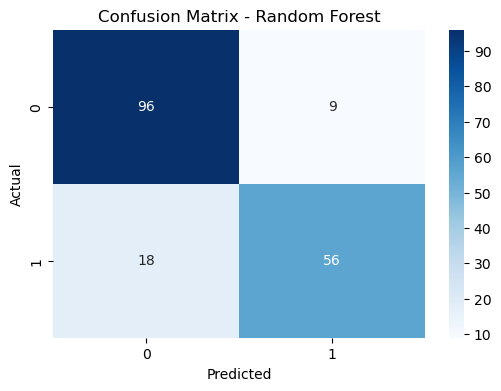

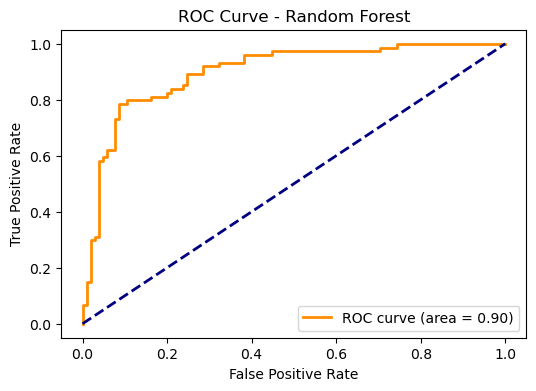

In [476]:
# Random Forest Classifier Visualizations
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1], "Random Forest")


Gradient Boosting Classifier:
Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



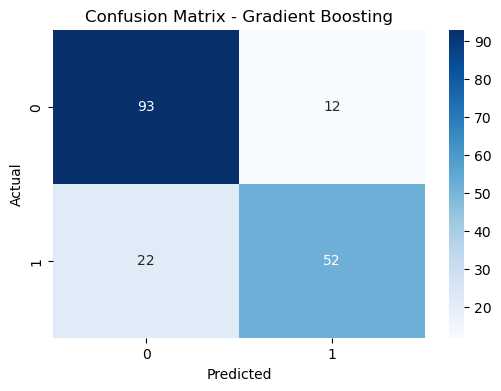

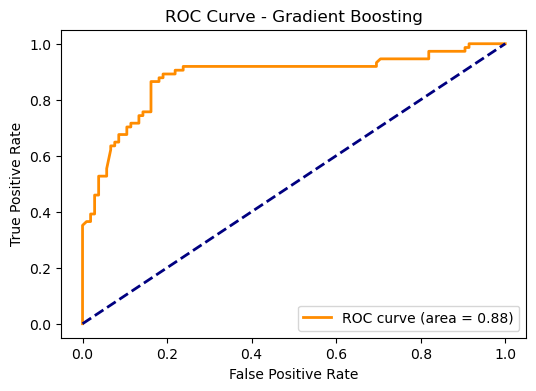

In [478]:
# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
# Gradient Boosting Classifier Visualizations
print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")
plot_roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1], "Gradient Boosting")

Support Vector Machine Classifier:
Accuracy: 0.7821229050279329
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



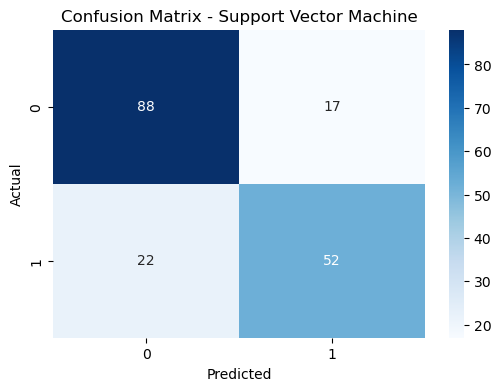

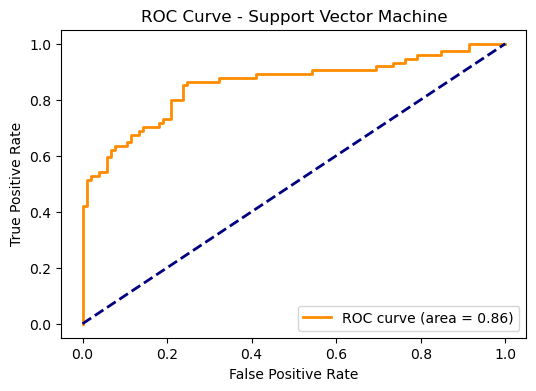

In [480]:
# Train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
# Support Vector Machine Classifier Visualizations
print("Support Vector Machine Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")
plot_roc_curve(y_test, svm_model.decision_function(X_test), "Support Vector Machine")


In [482]:
#we performed model evaluation and tuning using the Titanic dataset. We covered crossvalidation, grid search, and Bayesian optimization to 
#find the best hyperparameters for our mode